# Week 5 Project

## Assignment instruction

### Objective
Design a ML workflow that <br>
1) estimates the power system risk index <br>
2) defines its operational state

## Code

### Importing requirements and configuration

In [13]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


# Configuration
sns.set(color_codes=True)


In [14]:
data = pd.read_csv('./data.csv', index_col=0)

# Category indexing
i_voltage = np.arange(0,9)
i_angles= np.arange(9,18)
i_pgen = np.arange(18,27)
i_qgen = np.arange(27,36)
i_pdem = np.arange(36,45)
i_qdem = np.arange(45,54)
i_pflow = np.arange(54, 135)
i_qflow = np.arange(135, 216)
i_risk = 216

### Global Exploratory analysis

In [15]:
print("Row count is %i and column count is %i" % (data.shape[0], data.shape[1]))

Row count is 4955 and column count is 217


In [16]:
print(data.dtypes)


Bus Voltage-1    float64
Bus Voltage-2    float64
Bus Voltage-3    float64
Bus Voltage-4    float64
Bus Voltage-5    float64
                  ...   
Qflow Bus 9-6    float64
Qflow Bus 9-7    float64
Qflow Bus 9-8    float64
Qflow Bus 9-9    float64
Risk Factor      float64
Length: 217, dtype: object


In [17]:
data.head(5)

,Bus Voltage-1,Bus Voltage-2,Bus Voltage-3,Bus Voltage-4,Bus Voltage-5,Bus Voltage-6,Bus Voltage-7,Bus Voltage-8,Bus Voltage-9,Bus Angles-1,...,Qflow Bus 9-1,Qflow Bus 9-2,Qflow Bus 9-3,Qflow Bus 9-4,Qflow Bus 9-5,Qflow Bus 9-6,Qflow Bus 9-7,Qflow Bus 9-8,Qflow Bus 9-9,Risk Factor
0,1.04,1.025,1.025,1.051752,1.052997,1.045422,1.045174,1.044088,1.044771,0.0,...,0.0,0.0,-34.356254,0.0,0.0,-15.395107,0.0,-10.467886,0.0,0.0
1,1.04,1.025,1.025,1.045137,1.021813,1.036321,1.036890,1.035527,1.038926,0.0,...,0.0,0.0,-24.130608,0.0,0.0,-25.342725,0.0,-7.625909,0.0,0.0
2,1.04,1.025,1.025,1.048968,1.048291,1.038432,1.042474,1.039527,1.042019,0.0,...,0.0,0.0,-29.542666,0.0,0.0,-18.642362,0.0,-11.757630,0.0,0.0
3,1.04,1.025,1.025,1.044267,1.038909,0.963355,1.030858,1.022136,1.023767,0.0,...,0.0,0.0,2.386848,0.0,0.0,-29.549593,0.0,-17.076432,0.0,0.0
4,1.04,1.025,1.025,1.045679,1.043050,1.030835,1.039573,1.034735,1.039076,0.0,...,0.0,0.0,-24.394474,0.0,0.0,-22.055516,0.0,-13.056821,0.0,0.0


In [18]:
data.tail()

,Bus Voltage-1,Bus Voltage-2,Bus Voltage-3,Bus Voltage-4,Bus Voltage-5,Bus Voltage-6,Bus Voltage-7,Bus Voltage-8,Bus Voltage-9,Bus Angles-1,...,Qflow Bus 9-1,Qflow Bus 9-2,Qflow Bus 9-3,Qflow Bus 9-4,Qflow Bus 9-5,Qflow Bus 9-6,Qflow Bus 9-7,Qflow Bus 9-8,Qflow Bus 9-9,Risk Factor
4950,1.04,1.025,1.025,1.022635,1.004011,0.991431,0.994074,0.938196,1.029415,0.0,...,0.0,0.0,-5.661925,0.0,0.0,-14.718980,0.0,0.000000,0.0,1.000000
4951,1.04,1.025,1.025,1.027433,1.015501,0.992841,1.020574,0.995342,1.021973,0.0,...,0.0,0.0,7.369517,0.0,0.0,-26.645341,0.0,-29.016037,0.0,0.600000
4952,1.04,1.025,1.025,1.021805,0.926699,0.975947,0.996676,0.971266,1.006635,0.0,...,0.0,0.0,34.230410,0.0,0.0,-42.484784,0.0,-20.966076,0.0,0.333333
4953,1.04,1.025,1.025,1.023242,1.009582,0.984257,1.016618,0.988397,1.018144,0.0,...,0.0,0.0,14.075830,0.0,0.0,-30.354750,0.0,-30.882850,0.0,0.333333
4954,1.04,1.025,1.025,1.008458,0.963597,0.660016,0.961055,0.902734,0.930127,0.0,...,0.0,0.0,168.227852,0.0,0.0,-56.304444,0.0,-38.204832,0.0,0.466667


In [19]:
data.describe()

,Bus Voltage-1,Bus Voltage-2,Bus Voltage-3,Bus Voltage-4,Bus Voltage-5,Bus Voltage-6,Bus Voltage-7,Bus Voltage-8,Bus Voltage-9,Bus Angles-1,...,Qflow Bus 9-1,Qflow Bus 9-2,Qflow Bus 9-3,Qflow Bus 9-4,Qflow Bus 9-5,Qflow Bus 9-6,Qflow Bus 9-7,Qflow Bus 9-8,Qflow Bus 9-9,Risk Factor
count,4955.00,4.954000e+03,4.954000e+03,4953.000000,4952.000000,4952.000000,4952.000000,4953.000000,4952.000000,4952.0,...,4952.0,4950.0,4954.000000,4952.0,4951.0,4953.000000,4951.0,4953.000000,4951.0,4955.000000
mean,1.04,1.025000e+00,1.025000e+00,1.030615,1.012222,0.992949,1.027330,1.010639,1.026794,0.0,...,0.0,0.0,-2.138187,0.0,0.0,-23.967733,0.0,-17.177089,0.0,0.359435
std,0.00,8.694382e-08,4.262115e-08,0.011505,0.030708,0.045277,0.011577,0.024159,0.013757,0.0,...,0.0,0.0,24.133414,0.0,0.0,11.801733,0.0,9.000140,0.0,0.313263
min,1.04,1.025000e+00,1.025000e+00,0.955229,0.721258,0.656563,0.948898,0.846970,0.930127,0.0,...,0.0,0.0,-37.289933,0.0,0.0,-61.323504,0.0,-58.314593,0.0,0.000000
25%,1.04,1.025000e+00,1.025000e+00,1.024550,1.003742,0.982244,1.023329,1.002573,1.023959,0.0,...,0.0,0.0,-16.647164,0.0,0.0,-30.440607,0.0,-21.854165,0.0,0.066667
50%,1.04,1.025000e+00,1.025000e+00,1.032420,1.019263,1.004649,1.029734,1.016790,1.030133,0.0,...,0.0,0.0,-8.026925,0.0,0.0,-23.841514,0.0,-16.839227,0.0,0.333333
75%,1.04,1.025000e+00,1.025000e+00,1.038855,1.030515,1.019588,1.034868,1.026336,1.035039,0.0,...,0.0,0.0,2.912500,0.0,0.0,-17.377912,0.0,-12.511528,0.0,0.666667
max,1.04,1.025004e+00,1.025002e+00,1.053839,1.056295,1.052275,1.046161,1.047696,1.046448,0.0,...,0.0,0.0,168.227852,0.0,0.0,0.400269,0.0,1.448158,0.0,1.000000


In [20]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])


number of duplicate rows:  0


In [21]:
data.count()

Bus Voltage-1    4955
Bus Voltage-2    4954
Bus Voltage-3    4954
Bus Voltage-4    4953
Bus Voltage-5    4952
                 ... 
Qflow Bus 9-6    4953
Qflow Bus 9-7    4951
Qflow Bus 9-8    4953
Qflow Bus 9-9    4951
Risk Factor      4955
Length: 217, dtype: int64

In [22]:
# Finding the null values.
miss_count = data.isnull().sum()
print("Maximum missing values is %i\n" % np.max(miss_count))
print("Number of missing data points per column is: \n%s "% (miss_count))


Maximum missing values is 6

Number of missing data points per column is: 
Bus Voltage-1    0
Bus Voltage-2    1
Bus Voltage-3    1
Bus Voltage-4    2
Bus Voltage-5    3
                ..
Qflow Bus 9-6    2
Qflow Bus 9-7    4
Qflow Bus 9-8    2
Qflow Bus 9-9    4
Risk Factor      0
Length: 217, dtype: int64 


In [23]:
data.iloc[:, 216].describe()


count    4955.000000
mean        0.359435
std         0.313263
min         0.000000
25%         0.066667
50%         0.333333
75%         0.666667
max         1.000000
Name: Risk Factor, dtype: float64

#### Boxplotting data categories

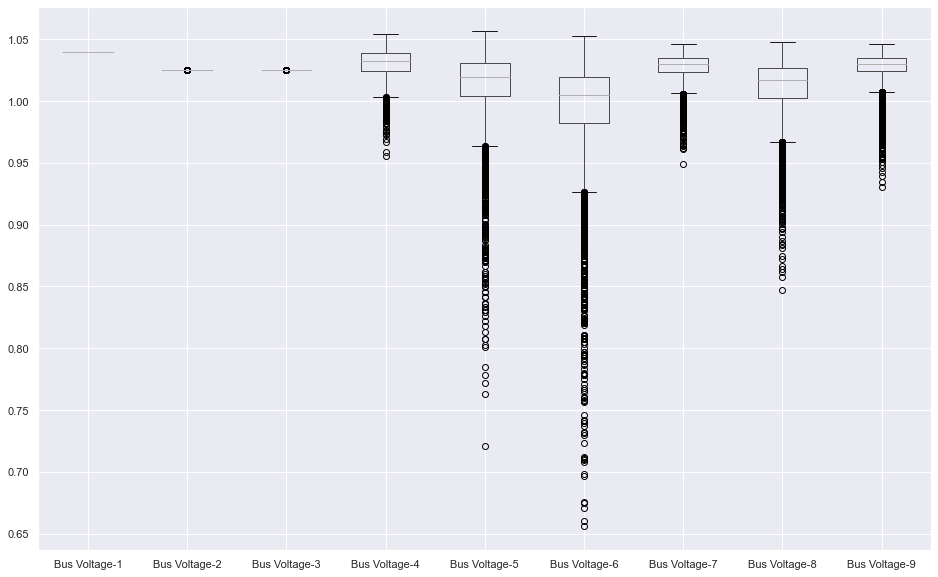

In [24]:
plt.figure(figsize=(16,10))
data.iloc[:, 0:9].boxplot();


In [25]:
data.iloc[:, 0:9].describe()

,Bus Voltage-1,Bus Voltage-2,Bus Voltage-3,Bus Voltage-4,Bus Voltage-5,Bus Voltage-6,Bus Voltage-7,Bus Voltage-8,Bus Voltage-9
count,4955.00,4.954000e+03,4.954000e+03,4953.000000,4952.000000,4952.000000,4952.000000,4953.000000,4952.000000
mean,1.04,1.025000e+00,1.025000e+00,1.030615,1.012222,0.992949,1.027330,1.010639,1.026794
std,0.00,8.694382e-08,4.262115e-08,0.011505,0.030708,0.045277,0.011577,0.024159,0.013757
min,1.04,1.025000e+00,1.025000e+00,0.955229,0.721258,0.656563,0.948898,0.846970,0.930127
25%,1.04,1.025000e+00,1.025000e+00,1.024550,1.003742,0.982244,1.023329,1.002573,1.023959
50%,1.04,1.025000e+00,1.025000e+00,1.032420,1.019263,1.004649,1.029734,1.016790,1.030133
75%,1.04,1.025000e+00,1.025000e+00,1.038855,1.030515,1.019588,1.034868,1.026336,1.035039
max,1.04,1.025004e+00,1.025002e+00,1.053839,1.056295,1.052275,1.046161,1.047696,1.046448


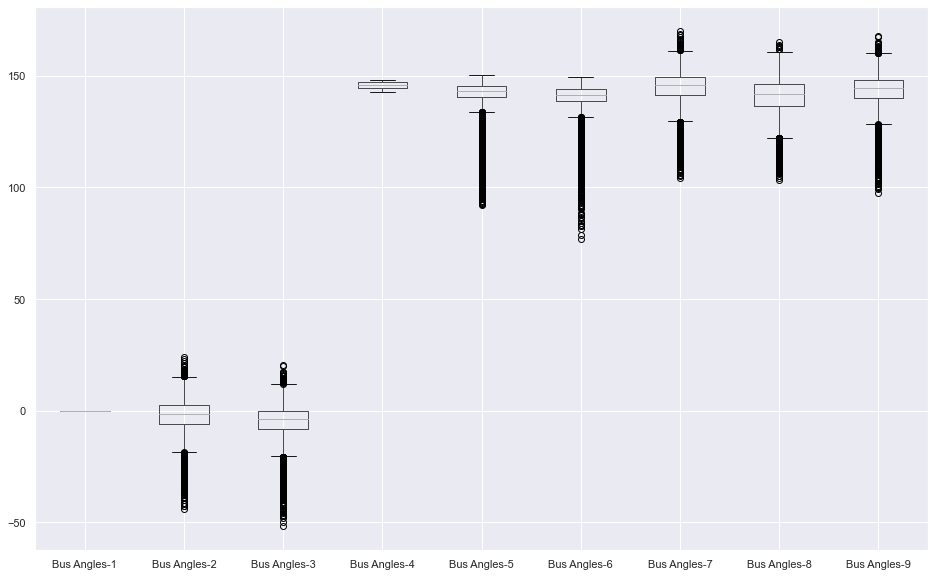

In [26]:
plt.figure(figsize=(16,10))
data.iloc[:, 9:18].boxplot();


In [27]:
data.iloc[:, 9:18].describe()

,Bus Angles-1,Bus Angles-2,Bus Angles-3,Bus Angles-4,Bus Angles-5,Bus Angles-6,Bus Angles-7,Bus Angles-8,Bus Angles-9
count,4952.0,4952.000000,4949.000000,4953.000000,4952.000000,4951.000000,4952.000000,4953.000000,4949.000000
mean,0.0,-2.608448,-5.534379,145.818867,141.170151,139.429848,144.405820,140.022249,142.635412
std,0.0,8.723190,8.975145,1.344953,7.718802,8.829583,8.509292,9.229580,8.888438
min,0.0,-44.087778,-51.424429,142.563284,92.049634,76.977519,104.276743,103.356711,97.567483
25%,0.0,-5.939902,-8.221916,144.608718,140.551192,138.832209,141.466865,136.559658,140.131509
50%,0.0,-1.379590,-3.720310,145.983646,142.941151,141.531093,145.679606,141.958775,144.436827
75%,0.0,2.558483,-0.073128,146.989525,145.131252,143.839522,149.379192,146.229754,148.124414
max,0.0,23.874872,20.329904,148.046673,150.126899,149.247035,169.779622,165.038084,167.582049


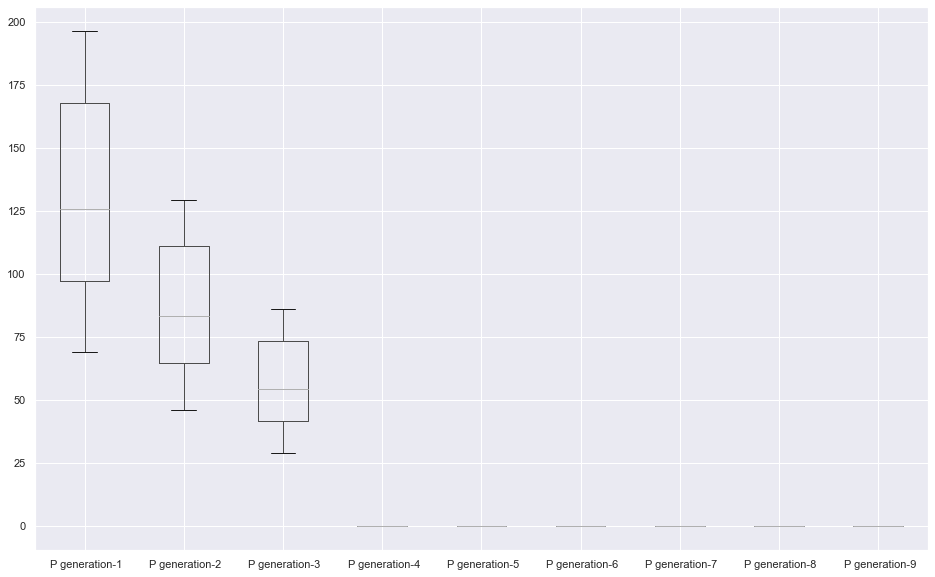

In [28]:
plt.figure(figsize=(16,10))
data.iloc[:, 18:27].boxplot();


In [29]:
data.iloc[:, 18:27].describe()


,P generation-1,P generation-2,P generation-3,P generation-4,P generation-5,P generation-6,P generation-7,P generation-8,P generation-9
count,4953.000000,4952.000000,4955.000000,4953.0,4954.0,4954.0,4953.0,4953.0,4953.0
mean,132.234843,87.598550,57.375124,0.0,0.0,0.0,0.0,0.0,0.0
std,40.523598,26.617229,18.302340,0.0,0.0,0.0,0.0,0.0,0.0
min,69.000000,46.000000,28.750000,0.0,0.0,0.0,0.0,0.0,0.0
25%,97.275002,64.543999,41.496002,0.0,0.0,0.0,0.0,0.0,0.0
50%,125.550003,83.087997,54.242001,0.0,0.0,0.0,0.0,0.0,0.0
75%,167.962494,110.903999,73.361000,0.0,0.0,0.0,0.0,0.0,0.0
max,196.237503,129.447998,86.107002,0.0,0.0,0.0,0.0,0.0,0.0


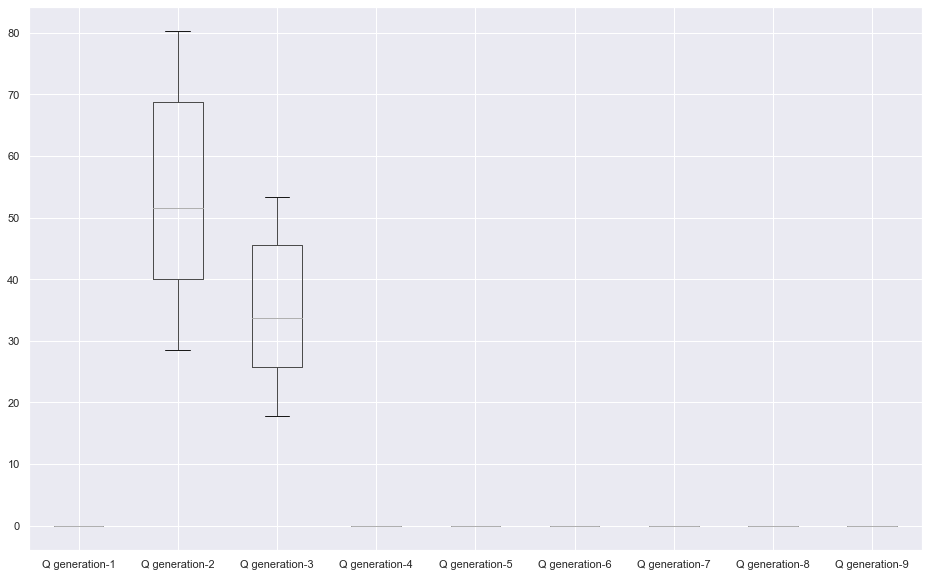

In [30]:
plt.figure(figsize=(16, 10))
data.iloc[:, 27:36].boxplot();


In [31]:
data.iloc[:, 27:36].describe()

,Q generation-1,Q generation-2,Q generation-3,Q generation-4,Q generation-5,Q generation-6,Q generation-7,Q generation-8,Q generation-9
count,4953.0,4949.000000,4953.000000,4953.0,4953.0,4952.0,4950.0,4954.0,4954.0
mean,0.0,54.289236,35.559504,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,16.495070,11.344725,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,28.508236,17.817656,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,40.000771,25.716923,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,51.493305,33.616188,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,68.732132,45.465084,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,80.224663,53.364349,0.0,0.0,0.0,0.0,0.0,0.0


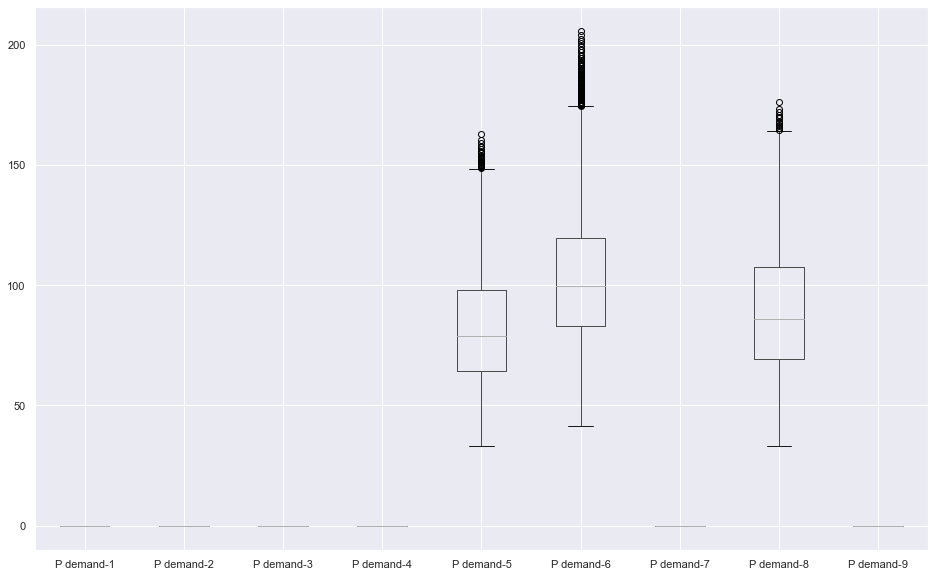

In [32]:
plt.figure(figsize=(16,10))
data.iloc[:, 36:45].boxplot();


In [33]:
data.iloc[:, 36:45].describe()


,P demand-1,P demand-2,P demand-3,P demand-4,P demand-5,P demand-6,P demand-7,P demand-8,P demand-9
count,4950.0,4954.0,4952.0,4955.0,4953.000000,4953.000000,4953.0,4953.000000,4953.0
mean,0.0,0.0,0.0,0.0,82.432422,103.542108,0.0,89.460394,0.0
std,0.0,0.0,0.0,0.0,23.862980,28.150389,0.0,26.312438,0.0
min,0.0,0.0,0.0,0.0,33.165180,41.231152,0.0,33.165180,0.0
25%,0.0,0.0,0.0,0.0,64.392357,83.166801,0.0,69.286041,0.0
50%,0.0,0.0,0.0,0.0,78.652283,99.681068,0.0,85.785545,0.0
75%,0.0,0.0,0.0,0.0,98.056549,119.728104,0.0,107.320969,0.0
max,0.0,0.0,0.0,0.0,162.952179,205.476898,0.0,176.024948,0.0


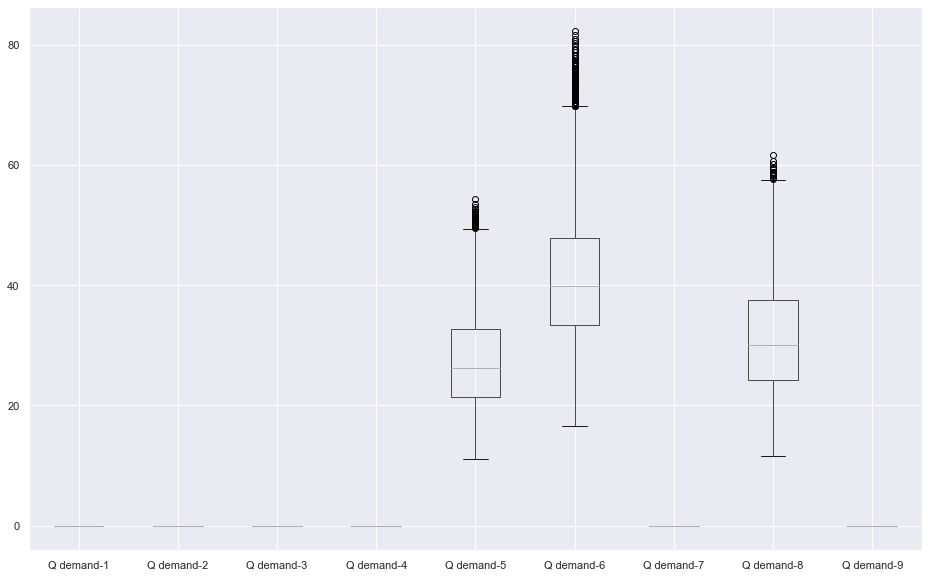

In [34]:
plt.figure(figsize=(16,10))
data.iloc[:, 45:54].boxplot();


In [35]:
data.iloc[:, 45:54].describe()

,Q demand-1,Q demand-2,Q demand-3,Q demand-4,Q demand-5,Q demand-6,Q demand-7,Q demand-8,Q demand-9
count,4954.0,4953.0,4954.0,4951.0,4955.000000,4954.000000,4954.0,4952.000000,4953.0
mean,0.0,0.0,0.0,0.0,27.449493,41.422928,0.0,31.304317,0.0
std,0.0,0.0,0.0,0.0,7.945379,11.263703,0.0,9.210297,0.0
min,0.0,0.0,0.0,0.0,11.044004,16.492460,0.0,11.607813,0.0
25%,0.0,0.0,0.0,0.0,21.446259,33.282581,0.0,24.243115,0.0
50%,0.0,0.0,0.0,0.0,26.191212,39.879389,0.0,30.017448,0.0
75%,0.0,0.0,0.0,0.0,32.647045,47.891243,0.0,37.555062,0.0
max,0.0,0.0,0.0,0.0,54.263073,82.190758,0.0,61.608734,0.0


<AxesSubplot:>

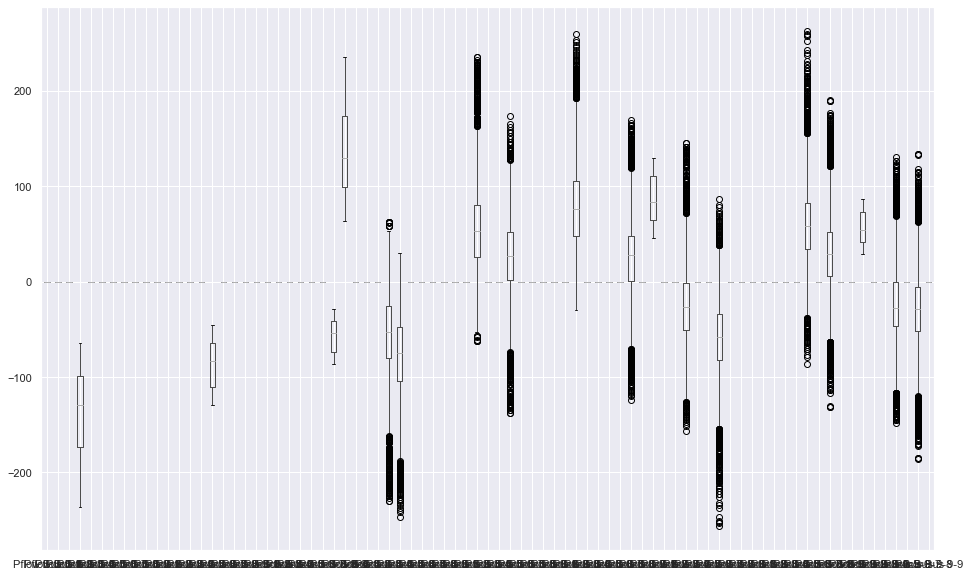

In [36]:
plt.figure(figsize=(16,10))
data.iloc[:, 54:135].boxplot()


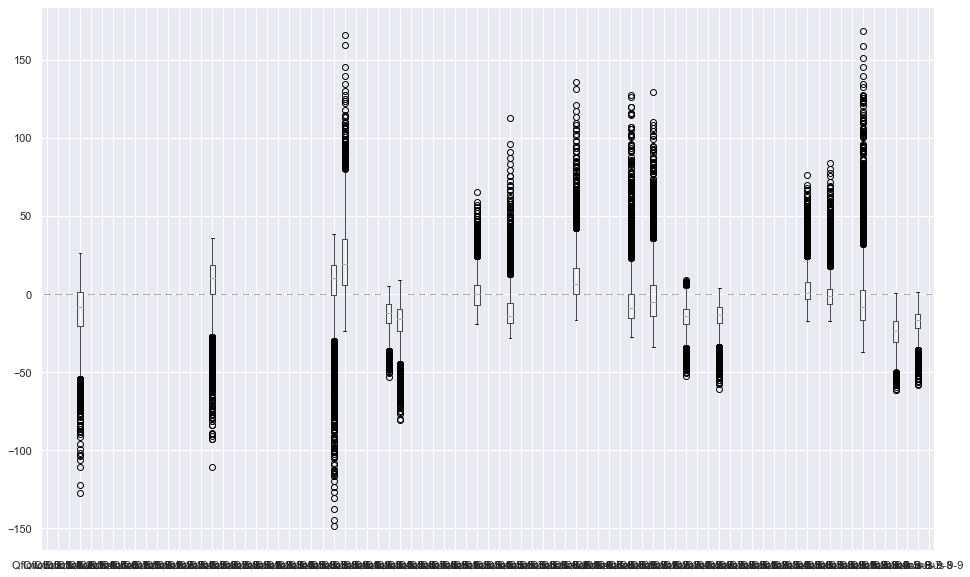

In [37]:
plt.figure(figsize=(16, 10))
data.iloc[:, 135:216].boxplot();


#### Cleaning up the non-existent data lines

In [38]:
flowData = data.iloc[:, 54:216]
flowData = flowData.loc[:, flowData.any()]


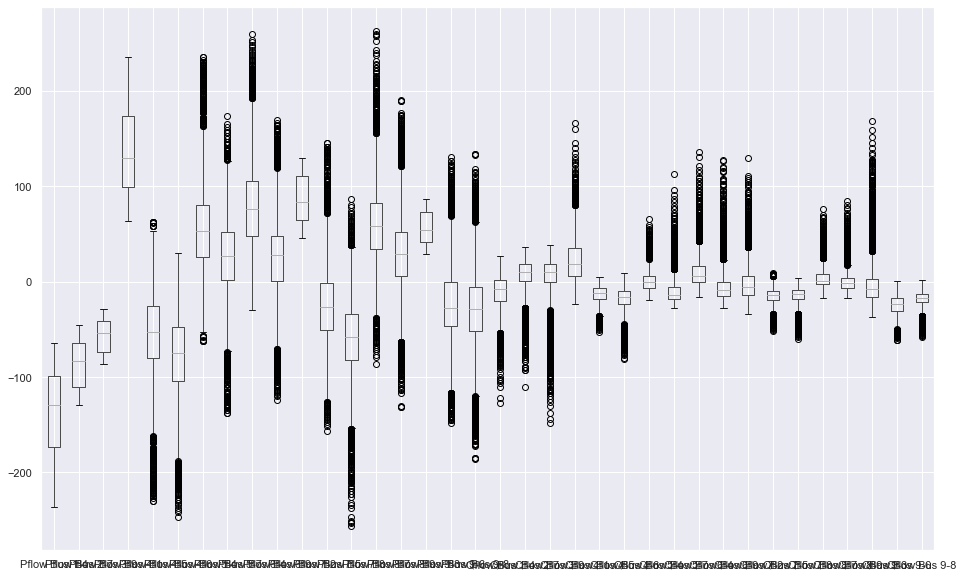

In [39]:
plt.figure(figsize=(16, 10))
flowData.boxplot();

#### Conclusion

Lots of missing data values. Multiple options to resolve. The cause of missing data is unclear and its connection to other features is unknown. Multiple options to investigate:
<br> - Delete the samples with data missing and use the remaining data
<br> - Fill in the missing data using common imputation techniques
<br> - Fill in the missing data using advanced imputation techniques (DL)

<br> Options are investigated without regard to proposing new features or using reduced number of features. This is a different element investigated.

### Dataset 1: Deleting the sample with data missing

In [40]:
data_raw= pd.concat([data.iloc[:, i_voltage], data.iloc[:, i_angles],
                data.iloc[:, i_pgen], data.iloc[:, i_qgen], data.iloc[:, i_pdem], 
                     data.iloc[:, i_qdem], data.iloc[:, i_pflow], data.iloc[:, i_qflow], data.iloc[:, i_risk]], axis=1)
# Assumption that zero data is not important
data_raw = data_raw.loc[:, data_raw.any()].dropna()
X1 = data_raw.iloc[:, 0:(data_raw.shape[1]-1)]
y1 = data_raw.iloc[:, (data_raw.shape[1]-1)]


In [41]:

print(X1.shape)
print(y1.shape)

(4802, 64)
(4802,)


### Dataset 2: Multivariate Data Imputation

In [42]:
data_raw= pd.concat([data.iloc[:, i_voltage], data.iloc[:, i_angles],
                data.iloc[:, i_pgen], data.iloc[:, i_qgen], data.iloc[:, i_pdem], 
                     data.iloc[:, i_qdem], data.iloc[:, i_pflow], data.iloc[:, i_qflow], data.iloc[:, i_risk]], axis=1)

X2raw = data_raw.iloc[:, 0:(data_raw.shape[1]-1)]
y2 = data_raw.iloc[:, (data_raw.shape[1]-1)]
print(X2raw.shape)
print(y2.shape)
print('Missing: %d' % sum(np.isnan(X2raw.to_numpy()).flatten()))


(4955, 216)
(4955,)
Missing: 496


In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=4720)
X2 = imputer.fit_transform(X2raw)
print('Missing: %d' % sum(np.isnan(X2).flatten()))


C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Missing: 0


<ipython-input-44-76ba66ebe2b7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


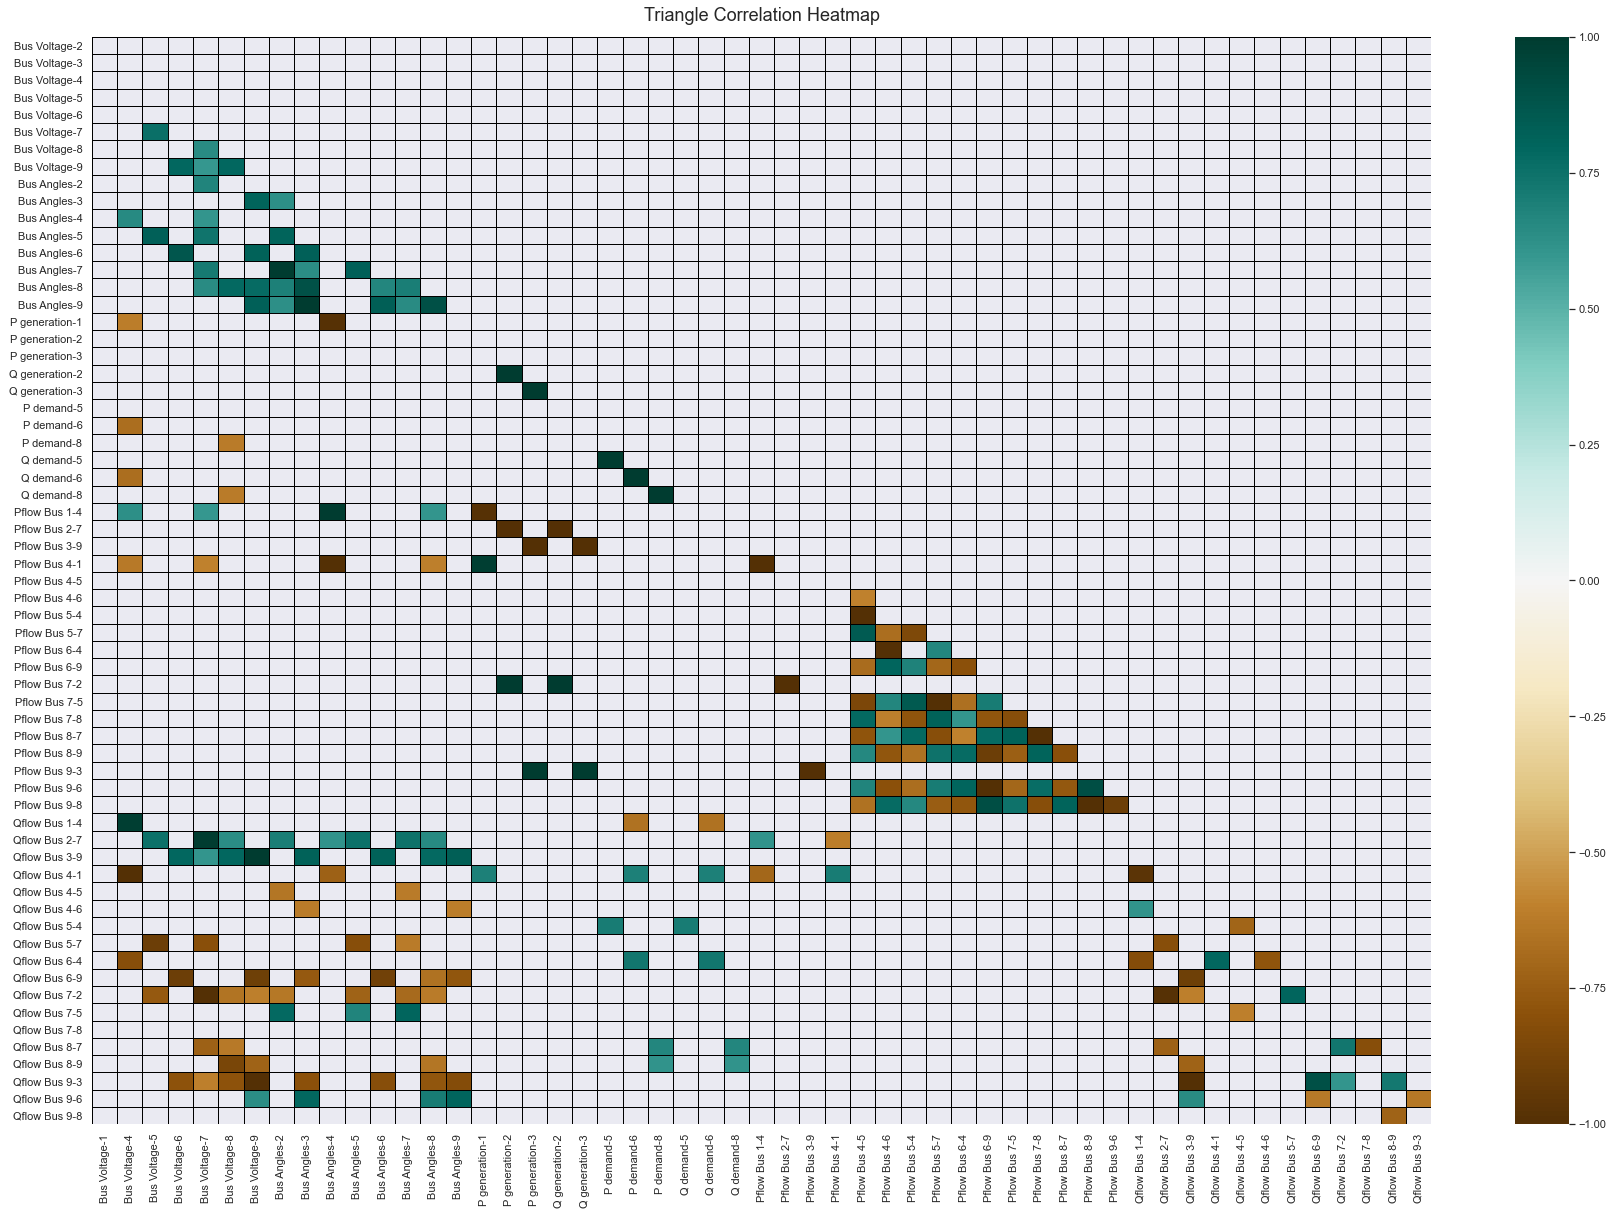

In [44]:
plt.figure(figsize=(30, 20));
corr = X1.corr();
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=False,
                      fmt='', cmap='BrBG', linewidths=1, linecolor='black')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize': 18}, pad=16)
plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
## Data splitting
def split_data(features, targets, test_size=0.2, validate_size=0.1):
    random_state = 4720
    # Get test sets
    features_train, features_test, targets_train, targets_test = train_test_split(
        features,
        targets,
        stratify=targets,
        test_size=test_size, random_state=random_state
    )
    # Run train_test_split again to get train and validate sets
    post_split_validate_size = validate_size / (1 - test_size)
    features_train, features_validate, targets_train, targets_validate = train_test_split(
        features_train,
        targets_train,
        stratify=targets_train,
        test_size=post_split_validate_size, random_state=random_state
    )
    return features_train, features_test, features_validate, targets_train, targets_test, targets_validate


In [47]:
X1train, X1test, X1validate, y1train, y1test, y1validate = split_data(
    X1, y1, test_size=0.2, validate_size=0.2)


##### Linear regression

In [48]:
# Simple linear regression model
def linearmodel(model, Xtrain, Xvalidate, ytrain, yvalidate, scaler=None):
    if scaler is not None:
        Xtrain = scaler.fit_transform(Xtrain)
        Xvalidate = scaler.transform(Xvalidate)

    model = model.fit(Xtrain, ytrain)
    mse = mean_squared_error(yvalidate, model.predict(Xvalidate))
    r2 = r2_score(yvalidate, model.predict(Xvalidate))
    # print("%s & %s gives\n MSE = %.3f\n R2 = %.3f \n" % (
        # model, scaler, mse, r2))
    return mse, r2


In [49]:
linearmodel(LinearRegression(), X1train, X1validate,
            y1train, y1validate, scaler=StandardScaler())
linearmodel(LinearRegression(), X1train, X1validate,
            y1train, y1validate, scaler=MinMaxScaler())
linearmodel(LinearRegression(), X1train, X1validate,
            y1train, y1validate, scaler=None)


(0.014214732641797333, 0.8549376738968931)

In [50]:
scaler_list = []
alpha_list = []
mse_list = []
r2_list= []
lscale = np.logspace(-9, 2, num=120, base=10)
for alpha in lscale:
    mse, r2 = linearmodel(Ridge(alpha=alpha), X1train, X1validate, y1train,
                y1validate, scaler=StandardScaler());
    scaler_list.append("StandardScaler")
    alpha_list.append(alpha)
    mse_list.append(mse)
    r2_list.append(r2)

    mse, r2 = linearmodel(Ridge(alpha=alpha), X1train, X1validate,
                y1train, y1validate, scaler=MinMaxScaler());

    scaler_list.append("MinMax")
    alpha_list.append(alpha)
    mse_list.append(mse)
    r2_list.append(r2)

    mse, r2 = linearmodel(Ridge(alpha=alpha), X1train, X1validate,
                y1train, y1validate, scaler=None);

    scaler_list.append("None")
    alpha_list.append(alpha)
    mse_list.append(mse)
    r2_list.append(r2)




C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.49744e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.33563e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.52588e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.15654e-17):

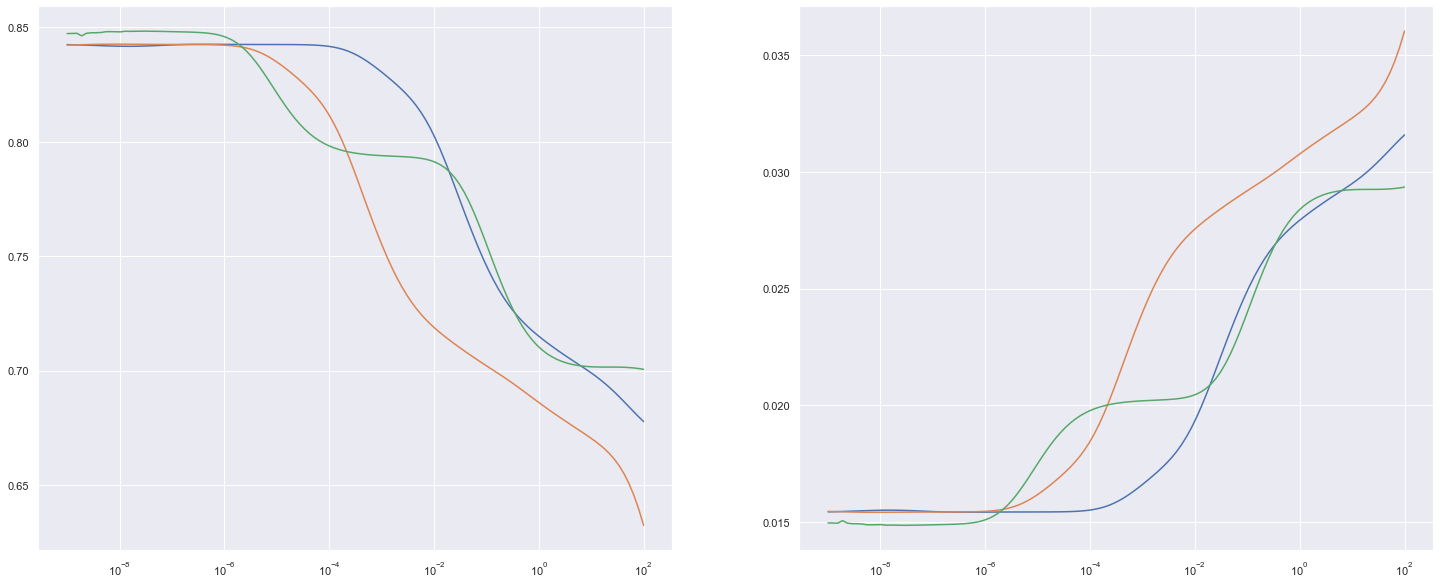

In [51]:
ridge_cols = {'scaler': scaler_list, 'alpha': alpha_list, 'MSE': mse_list, 'R2': r2_list}
df_ridge = pd.DataFrame(ridge_cols)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
ax1.set_xscale('log')
ax2.set_xscale('log')
for scaler in df_ridge['scaler'].unique():
    ax1.plot(df_ridge.loc[df_ridge['scaler'] == scaler, 'alpha'],
             df_ridge.loc[df_ridge['scaler'] == scaler, 'R2'])
    
    ax2.plot(df_ridge.loc[df_ridge['scaler'] == scaler, 'alpha'],
             df_ridge.loc[df_ridge['scaler'] == scaler, 'MSE'])
plt.show()


In [52]:
linearmodel(Lasso(), X1train, X1validate, y1train,
            y1validate, scaler=StandardScaler())
linearmodel(Lasso(), X1train, X1validate,
            y1train, y1validate, scaler=MinMaxScaler())
linearmodel(Lasso(), X1train, X1validate,
            y1train, y1validate, scaler=None)


(0.04546962666376536, 0.5359793267239633)

#### Non Linear models
##### Support Vector Regression

In [53]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge


In [54]:
svr_rbf = SVR(kernel="rbf")
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_poly = SVR(kernel="poly", C=100, gamma="auto",
#                degree=3, epsilon=0.1, coef0=1)

ytrain = y1train
yvalidate = y1validate

#Standardscaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X1train)
Xvalidate = scaler.transform(X1validate)

svr_rbf = svr_rbf.fit(Xtrain, ytrain)
ypredict = svr_rbf.predict(Xvalidate)

mse = mean_squared_error(yvalidate, svr_rbf.predict(Xvalidate))
r2 = r2_score(yvalidate, svr_rbf.predict(Xvalidate))
print(mse)
print(r2)

0.005759807974594907
0.941220762728583


In [55]:
svr_rbf = SVR(kernel="rbf")
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_poly = SVR(kernel="poly", C=100, gamma="auto",
#                degree=3, epsilon=0.1, coef0=1)

ytrain = y1train
yvalidate = y1validate

#MinMaxScaling
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(X1train)
Xvalidate = scaler.transform(X1validate)

svr_rbf = svr_rbf.fit(Xtrain, ytrain)
ypredict = svr_rbf.predict(Xvalidate)

mse = mean_squared_error(yvalidate, svr_rbf.predict(Xvalidate))
r2 = r2_score(yvalidate, svr_rbf.predict(Xvalidate))
print(mse)
print(r2)

0.00489944096021586
0.9500008673955694


##### Kernel Ridge Regression

In [56]:
krr = KernelRidge(alpha=1.0)

ytrain = y1train
yvalidate = y1validate

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X1train)
Xvalidate = scaler.transform(X1validate)

krr = krr.fit(Xtrain, ytrain)
ypredict = krr.predict(Xvalidate)

mse = mean_squared_error(yvalidate, ypredict)
# r2 = r2_score(yvalidate, ypredict)
r2 = krr.score(Xvalidate, yvalidate)
print(mse)
print(r2)


0.1498883939401687
-0.5296213885082584


In [57]:
krr = KernelRidge(alpha=1.0)

ytrain = y1train
yvalidate = y1validate

scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(X1train)
Xvalidate = scaler.transform(X1validate)

krr = krr.fit(Xtrain, ytrain)
ypredict = krr.predict(Xvalidate)

mse = mean_squared_error(yvalidate, ypredict)
# r2 = r2_score(yvalidate, ypredict)
r2 = krr.score(Xvalidate, yvalidate)
print(mse)
print(r2)


0.03079037673186755
0.6857820837810052


pipeline

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
random_state = 4720
# X1, y1, test_size = 0.2, validate_size = 0.2
# train_test_split( features, targets, stratify = targets, test_size = test_size, random_state = random_state

CVX1train, CVX1test, CVy1train, CVy1test = train_test_split(
    X2, y2, stratify=y2, test_size=0.3, random_state=4720)


In [63]:
params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    # 'SVR__C': [0.01, 0.1, 1, 10],
    # 'SVR__gamma': [0.01, 0.05, 0.1],
    # 'selectK__k': [5, 10, 15, 20, 25, 30],
    'selectK__score_func': [f_regression, f_classif],
    'SVR__kernel': ['linear', 'rbf']
}


steps = [('scaler', StandardScaler()), ('selectK', SelectKBest(
    score_func=f_regression, k=25)), ('SVR', SVR())]

pipeline = Pipeline(steps)
grid = GridSearchCV(pipeline, params, cv=10, n_jobs=-1)
grid.fit(CVX1train, CVy1train)


C:\Users\Philippe vanMastrigt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectK',
                                        SelectKBest(k=25,
                                                    score_func=<function f_regression at 0x000002C5A13D6B80>)),
                                       ('SVR', SVR())]),
             n_jobs=-1,
             param_grid={'SVR__kernel': ['linear', 'rbf'],
                         'scaler': [StandardScaler(), MinMaxScaler()],
                         'selectK__score_func': [<function f_regression at 0x000002C5A13D6B80>,
                                                 <function f_classif at 0x000002C5A13D6940>]})

In [64]:
print('Training set score: ' + str(grid.score(CVX1train, CVy1train)))
print('Test set score: ' + str(grid.score(CVX1test, CVy1test)))

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# # Stores the optimum model in best_pipe
# best_pipe = grid.best_estimator_
# print(best_pipe)


Training set score: 0.9659132195734088
Test set score: 0.9601023178364523
{'SVR__kernel': 'rbf', 'scaler': StandardScaler(), 'selectK__score_func': <function f_regression at 0x000002C5A13D6B80>}


In [65]:
pipeline.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'selectK', 'SVR', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'selectK__k', 'selectK__score_func', 'SVR__C', 'SVR__cache_size', 'SVR__coef0', 'SVR__degree', 'SVR__epsilon', 'SVR__gamma', 'SVR__kernel', 'SVR__max_iter', 'SVR__shrinking', 'SVR__tol', 'SVR__verbose'])